In [2]:
import sqlalchemy as db
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly as py
# TODO: Import KMeans
from sklearn.cluster import KMeans
py.offline.init_notebook_mode(connected = True)

# este es el fichero para conectarnos a MySQ


C:\Users\lsilvaa\AppData\Local\Temp\ipykernel_30188\1161714217.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Carguemos la información 

## Incrementaremos la base de datos

In [16]:
movie_data = pd.read_excel("movie.xlsx")
movie_data.columns = ['movieId', 'title', 'gender', 'releaseDate', 'ParticipantName',
       'Roleparticipant', 'AwardMovie']

In [6]:
users = pd.read_csv("users2.csv",sep=";")
users = users.drop_duplicates()

In [7]:
watchs_data = pd.read_csv("Awards_moviev2.csv",sep=";",usecols=["idUser","movieId","rating"])

In [9]:
watchs_data

,idUser,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [21]:
movies_data=watchs_data.merge(  movie_data  ,on="movieId",how="left")


#pd.read_sql('''SELECT * FROM dw_netflix.factwatchs as a
#LEFT JOIN dw_netflix.dimmovie as b on a.movieID=b.movieID;''', con=engine ) 
movies_data.head()

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie
0,1,31,2.5,Dangerous Minds,Drama,1995-01-01,Director,Director,Oscar
1,1,1029,3.0,Dumbo,Animation,1941-01-01,Director,Director,Oscar
2,1,1061,3.0,Sleepers,Thriller,1996-01-01,Director,Director,Sin Info
3,1,1129,2.0,Escape from New York,Action,1981-01-01,Actor,Director,Oscar
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso),Drama,1989-01-01,Director,Actor,Grammy


In [22]:
tabla_model = pd.pivot_table(movies_data, values='rating', index=['idUser'],
                       columns=['gender'], aggfunc="mean").reset_index()
tabla_model.columns

Index(['idUser', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object', name='gender')

# Repliquemos lo anterior

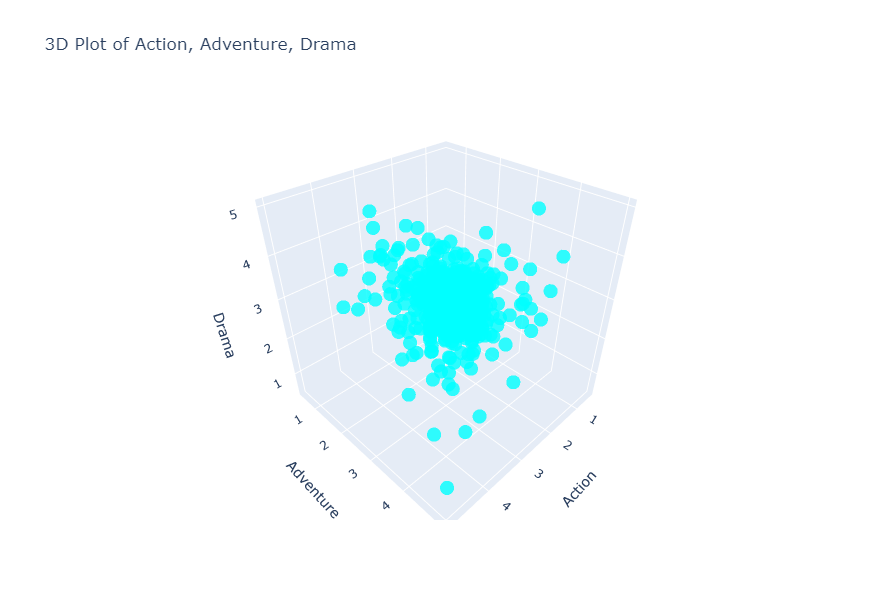

In [23]:
# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tabla_model['Action'],
    y=tabla_model['Adventure'],
    z=tabla_model['Drama'],
    mode='markers',
    marker=dict(
        size=8,
        color='cyan',  # Color by the 'Drama' dimension
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    title='3D Plot of Action, Adventure, Drama',
    scene=dict(
        xaxis_title='Action',
        yaxis_title='Adventure',
        zaxis_title='Drama'
    ),
    width=900,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig.show()

In [24]:
X1 = tabla_model[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']].fillna(0).iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 20 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

D:\DatapathClass\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



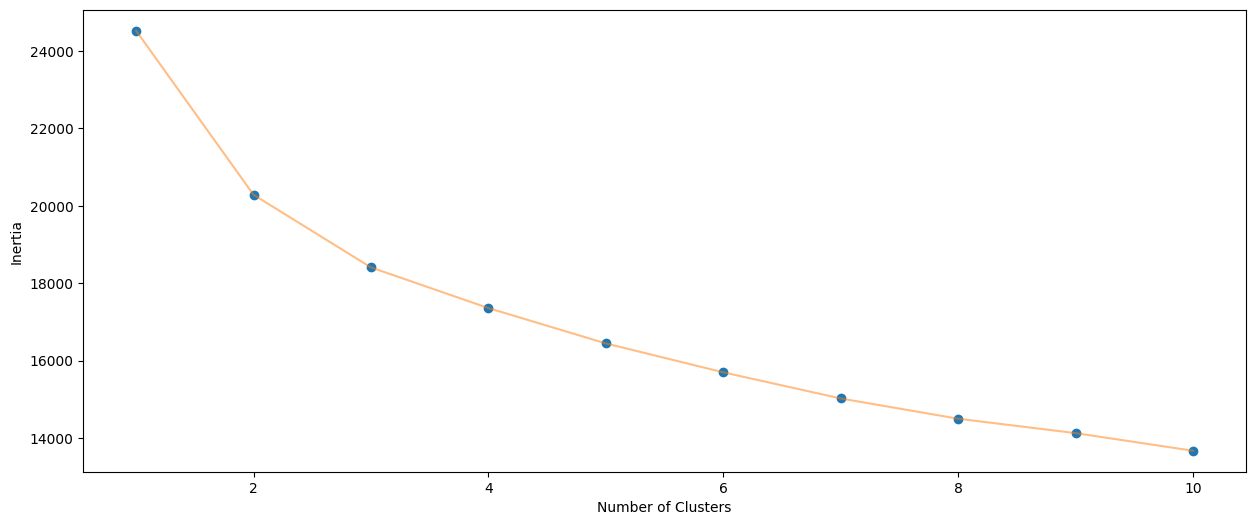

In [25]:
import matplotlib.pyplot as plt 

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [26]:
# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=4, random_state=0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(tabla_model[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']].fillna(0))

In [27]:
tabla_model['Cluster'] = predictions

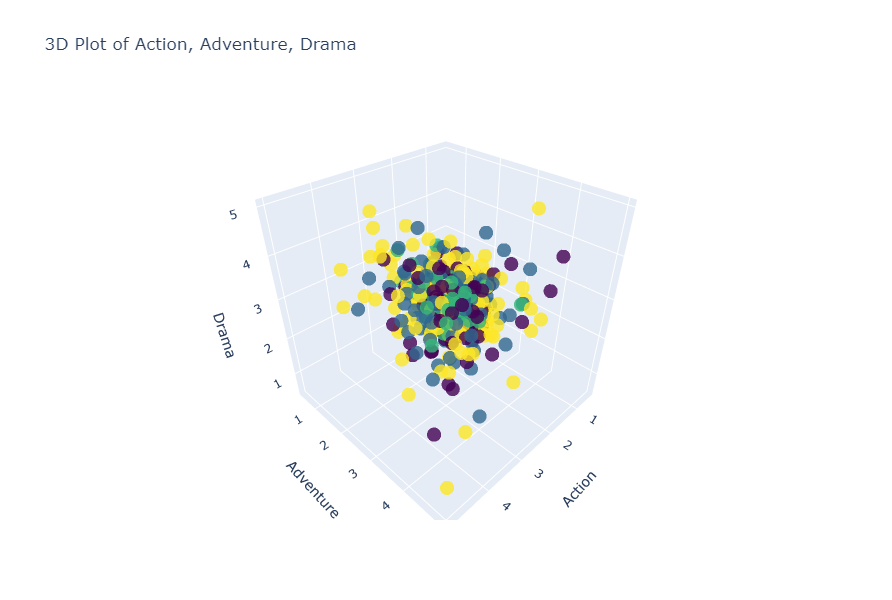

In [28]:
# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tabla_model['Action'],
    y=tabla_model['Adventure'],
    z=tabla_model['Drama'],
    mode='markers',
    marker=dict(
        size=8,
        color=predictions,  # Color by the 'Drama' dimension
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    title='3D Plot of Action, Adventure, Drama',
    scene=dict(
        xaxis_title='Action',
        yaxis_title='Adventure',
        zaxis_title='Drama'
    ),
    width=900,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig.show()

## Como funciona el filtro colectivo

La idea detras del filtro colectivo, es que podamos primero encontrar similitudes entre las personas, en el caso anterior, encontraremos grupos en funcion de los generos que mas les gusta ver. A partir de ello, en cada cluster buscaremos las peliculas mas rankeadas, y lo que haremos es bridarle a cada usuario la lista de peliculas que aun no ha visto pero que su cluster si lo haya visto y tenga un buen puntaje

In [30]:
movies_datacluster = movies_data.merge(tabla_model[['idUser','Cluster']],on='idUser',how='left')

In [31]:
movies_datacluster

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie,Cluster
0,1,31,2.5,Dangerous Minds,Drama,1995-01-01,Director,Director,Oscar,1
1,1,1029,3.0,Dumbo,Animation,1941-01-01,Director,Director,Oscar,1
2,1,1061,3.0,Sleepers,Thriller,1996-01-01,Director,Director,Sin Info,1
3,1,1129,2.0,Escape from New York,Action,1981-01-01,Actor,Director,Oscar,1
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso),Drama,1989-01-01,Director,Actor,Grammy,1
...,...,...,...,...,...,...,...,...,...,...
99999,671,6268,2.5,Raising Victor Vargas,Comedy,2002-01-01,Director,Director,Grammy,2
100000,671,6269,4.0,Stevie,Documentary,2002-01-01,Director,Actor,Sin Info,2
100001,671,6365,4.0,"Matrix Reloaded, The",Action,2003-01-01,Director,Actor,Sin Info,2
100002,671,6385,2.5,Whale Rider,Drama,2002-01-01,Actor,Director,Sin Info,2


## ¿Como funciona el filtro?

Imaginemos que queremos recomendarle peliculas al usuario 101, que peliculas le recomendarian

In [32]:
movies_datacluster[movies_datacluster["idUser"]==11]

## Tenemos el cluster 13

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie,Cluster
790,11,50,5.0,"Usual Suspects, The",Crime,1995-01-01,Director,Director,Grammy,3
791,11,70,1.0,From Dusk Till Dawn,Action,1996-01-01,Director,Director,Sin Info,3
792,11,126,4.0,"NeverEnding Story III, The",Adventure,1994-01-01,Director,Director,Sin Info,3
793,11,169,3.0,Free Willy 2: The Adventure Home,Adventure,1995-01-01,Director,Actor,Sin Info,3
794,11,296,5.0,Pulp Fiction,Comedy,1994-01-01,Actor,Director,Grammy,3
795,11,778,4.5,Trainspotting,Comedy,1996-01-01,Director,Actor,Sin Info,3
796,11,785,3.5,Kingpin,Comedy,1996-01-01,Director,Actor,Sin Info,3
797,11,923,5.0,Citizen Kane,Drama,1941-01-01,Actor,Director,Grammy,3
798,11,1027,4.5,Robin Hood: Prince of Thieves,Adventure,1991-01-01,Actor,Director,Oscar,3
799,11,1201,5.0,"Good, the Bad and the Ugly, The (Buono, il bru...",Action,1966-01-01,Actor,Director,Grammy,3


In [33]:
## Top peliculas cluster 0
ranking_cluster0 = movies_datacluster[movies_datacluster["Cluster"]==0].groupby(['title'])["rating"].mean().sort_values(ascending=False)
ranking_cluster0 = ranking_cluster0.reset_index()
ranking_cluster0

,title,rating
0,Rosencrantz and Guildenstern Are Dead,5.0
1,Amazing Grace,5.0
2,Son of Frankenstein,5.0
3,Lake Placid,5.0
4,Lamerica,5.0
...,...,...
3671,"Christmas Carol, A",0.5
3672,Return of the Living Dead Part II,0.5
3673,Meet the Feebles,0.5
3674,Tekkonkinkreet (Tekkon kinkurîto),0.5


In [34]:
## ¿que peliculas ya vio el usuaruo 11 
movies_datacluster[movies_datacluster["idUser"]==11]["title"]

790                                 Usual Suspects, The 
791                                 From Dusk Till Dawn 
792                          NeverEnding Story III, The 
793                    Free Willy 2: The Adventure Home 
794                                        Pulp Fiction 
795                                       Trainspotting 
796                                             Kingpin 
797                                        Citizen Kane 
798                       Robin Hood: Prince of Thieves 
799    Good, the Bad and the Ugly, The (Buono, il bru...
800                           Last of the Mohicans, The 
801                                     Lethal Weapon 4 
802                                D2: The Mighty Ducks 
803                                           SLC Punk! 
804                                    Sixth Sense, The 
805                                  Do the Right Thing 
806                               Bowling for Columbine 
807                            

In [35]:
## ¿Que peliculas no ha visto, le recomendaremos 10 peliculas?
ranking_cluster0[~ranking_cluster0['title'].isin(movies_datacluster[movies_datacluster["idUser"]==11]["title"])][0:10]

,title,rating
0,Rosencrantz and Guildenstern Are Dead,5.0
1,Amazing Grace,5.0
2,Son of Frankenstein,5.0
3,Lake Placid,5.0
4,Lamerica,5.0
5,"Mirror Has Two Faces, The",5.0
6,Miracle Mile,5.0
7,Land and Freedom (Tierra y libertad),5.0
8,The Witch,5.0
9,Amarcord,5.0


### ¿ Y si, hacemos un modolo de clusterizacion mas complejo?

Cree unas funciones que permiten agilizar la corrida del modelo

In [37]:


def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    missing_values_count = user_movie_ratings.isnull().sum()

    sorted_columns = missing_values_count.sort_values().index.tolist()
    
    user_movie_ratings_sorted =user_movie_ratings[sorted_columns]
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

## Cargamos la información similar al caso anterior, sin embargo aqui haremos que cada pelicula sea una columna

In [38]:
user_movie_ratings=pd.pivot_table(movies_data, values='rating', index=['idUser'],
                       columns=['title'], aggfunc="mean")
#del user_movie_ratings["0"]

user_movie_ratings

title,"""Great Performances"" Cats",$9.99,'Hellboy': The Seeds of Creation,'Neath the Arizona Skies,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,...,"Zorro, the Gay Blade",Zulu,[REC],eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us),İtirazım Var
idUser,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Esta funcion les permitira poder observar solo el grupo de peliculas mas vistas por lo que no se veran tantos nulls

In [39]:
n_movies = 30
n_users = 10
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)

dataset dimensions:  (10, 30)


In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    # Reverse to match the order of the printed dataframe
    #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')

    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

Visualizaremos lo anterior de una mejor manera con esta funcion

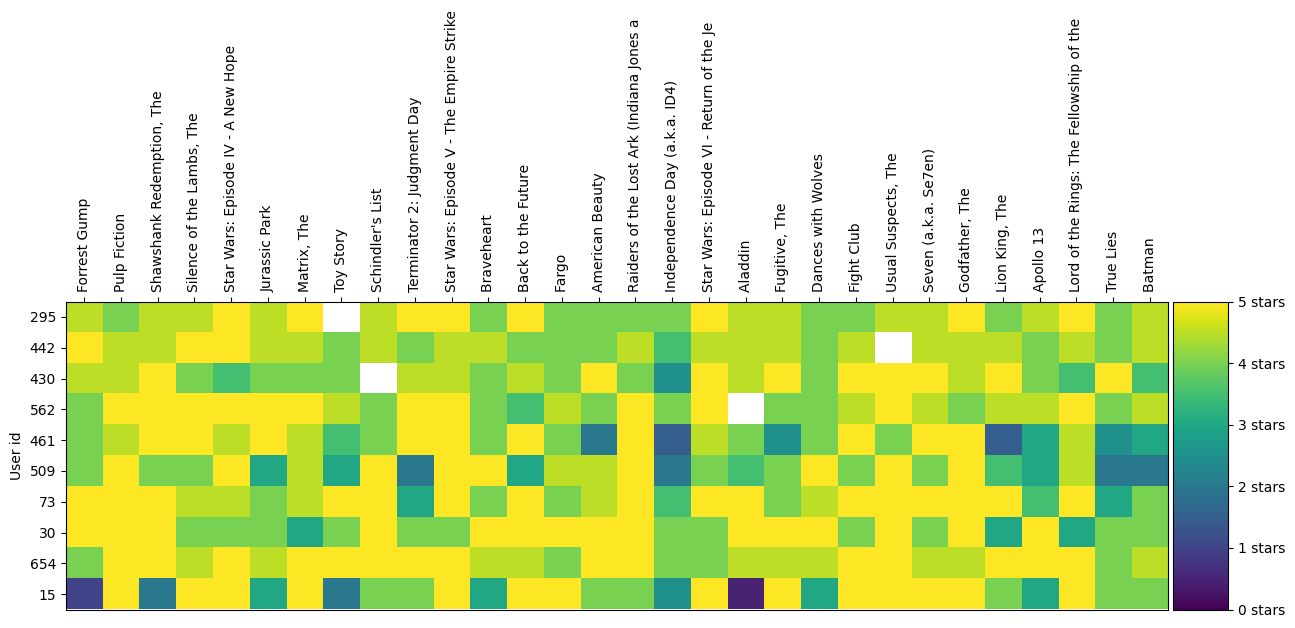

In [42]:
draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True)

Para no demorar procesando toda la informacion, reduciremos los datos a una muestra de solo 1000 peliculas con mas vistas

In [43]:

most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)


Ahora crearemos una matriz para poder generar cluster a partir de la informacion del puntaje de todas las peliculas que han visto

In [44]:

from scipy.sparse import csr_matrix
for column in most_rated_movies_1k.columns:
    most_rated_movies_1k[column] = pd.arrays.SparseArray(most_rated_movies_1k[column], dtype=pd.SparseDtype("float", 0))
most_rated_movies_1k = most_rated_movies_1k.fillna(0)



In [45]:
sparse_ratings = csr_matrix(most_rated_movies_1k.sparse.to_coo())


In [46]:
predictions = KMeans(n_clusters=20, algorithm='lloyd').fit_predict(sparse_ratings)


In [47]:
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
#helper.draw_movie_clusters(clustered, max_users, max_movies)

In [48]:
clustered

,idUser,Forrest Gump,Pulp Fiction,"Shawshank Redemption, The","Silence of the Lambs, The",Star Wars: Episode IV - A New Hope,Jurassic Park,"Matrix, The",Toy Story,Schindler's List,...,"Sword in the Stone, The","Brothers McMullen, The",Moonrise Kingdom,Watchmen,And Your Mother Too (Y tu mamá también),"Motorcycle Diaries, The (Diarios de motocicleta)",Airheads,"Waterboy, The",Battle Royale (Batoru rowaiaru),group
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,2,3.0,4.0,0,3.0,0,4.0,0,0,4.0,...,0,3.0,0,0,0,0,0,0,0,19
2,3,5.0,4.5,5.0,3.0,0,0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,15
3,4,5.0,5.0,0,0,5.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,4.0,5.0,0,0,0,4.0,0,0,0,...,0,5.0,0,0,0,0,0,0,0,19
667,668,0,5.0,4.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
668,669,0,0,0,0,5.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
669,670,0,0,5.0,5.0,0,0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,15


In [49]:
movies_datacluster_peliculas = movies_data.merge(clustered[['idUser','group']],on='idUser',how='left')

Veamos al usuario 11 y veamos que cluster tiene

In [50]:
movies_datacluster_peliculas [movies_datacluster_peliculas ["idUser"]==11]

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie,group
790,11,50,5.0,"Usual Suspects, The",Crime,1995-01-01,Director,Director,Grammy,15
791,11,70,1.0,From Dusk Till Dawn,Action,1996-01-01,Director,Director,Sin Info,15
792,11,126,4.0,"NeverEnding Story III, The",Adventure,1994-01-01,Director,Director,Sin Info,15
793,11,169,3.0,Free Willy 2: The Adventure Home,Adventure,1995-01-01,Director,Actor,Sin Info,15
794,11,296,5.0,Pulp Fiction,Comedy,1994-01-01,Actor,Director,Grammy,15
795,11,778,4.5,Trainspotting,Comedy,1996-01-01,Director,Actor,Sin Info,15
796,11,785,3.5,Kingpin,Comedy,1996-01-01,Director,Actor,Sin Info,15
797,11,923,5.0,Citizen Kane,Drama,1941-01-01,Actor,Director,Grammy,15
798,11,1027,4.5,Robin Hood: Prince of Thieves,Adventure,1991-01-01,Actor,Director,Oscar,15
799,11,1201,5.0,"Good, the Bad and the Ugly, The (Buono, il bru...",Action,1966-01-01,Actor,Director,Grammy,15


 Seleccionamos un cluster 16 y calculamos los puntajes medios y lo rankeamos

In [51]:
top_peliculas = clustered[clustered["group"]==10][clustered.columns[1: len(clustered.columns) -1]].mean().reset_index().sort_values(0,ascending=False)
top_peliculas.columns = ["title","ranking"]
top_peliculas

,title,ranking
0,Forrest Gump,3.954545
1,Pulp Fiction,3.727273
3,"Silence of the Lambs, The",3.681818
5,Jurassic Park,3.681818
19,"Fugitive, The",3.681818
...,...,...
441,"40-Year-Old Virgin, The",0
442,"Hunchback of Notre Dame, The",0
443,American Psycho,0
445,"Birds, The",0


¿Qué peliculas vio el usuario 11?

In [52]:
movies_datacluster_peliculas [movies_datacluster_peliculas ["idUser"]==11]["title"]

790                                 Usual Suspects, The 
791                                 From Dusk Till Dawn 
792                          NeverEnding Story III, The 
793                    Free Willy 2: The Adventure Home 
794                                        Pulp Fiction 
795                                       Trainspotting 
796                                             Kingpin 
797                                        Citizen Kane 
798                       Robin Hood: Prince of Thieves 
799    Good, the Bad and the Ugly, The (Buono, il bru...
800                           Last of the Mohicans, The 
801                                     Lethal Weapon 4 
802                                D2: The Mighty Ducks 
803                                           SLC Punk! 
804                                    Sixth Sense, The 
805                                  Do the Right Thing 
806                               Bowling for Columbine 
807                            

¿Qué peliculas el recomendamos con el nuevo modelo al usuario 11?

In [53]:
top_peliculas[ ~top_peliculas["title"].isin(movies_datacluster_peliculas[movies_datacluster_peliculas ["idUser"]==11]["title"])].sort_values("ranking",ascending=False)[0:10]

,title,ranking
0,Forrest Gump,3.954545
19,"Fugitive, The",3.681818
3,"Silence of the Lambs, The",3.681818
5,Jurassic Park,3.681818
26,Apollo 13,3.590909
9,Terminator 2: Judgment Day,3.545455
28,True Lies,3.5
20,Dances with Wolves,3.454545
219,Crimson Tide,3.363636
107,Clear and Present Danger,3.363636
